# TKT4108 Structural Dynamics 2

## Solution exercise 3

**Main topics:** Correlation and statistical properties of random processes

**References:** Newland Chapter 1-3

### Problem 1: Technical terms



**a)**

A stochastic process is stationary if its statistical properties do not change over time. Specifically, this means that the joint probability distribution of process independent of time. In more practical terms, the mean and variance, and all higher-order statistical moments do not change over time.

**b)**

Weakly stationarity requires only the mean and variance (the two first statistical moments) to be independent of time. Additionally, the autocorrelation function must depend only on the time lag $\tau$ between two time instants, rather than on the specific times themselves. This is a less strict form of stationarity.

**c)**
A stochastic process is ergodic if its time averages are equal to ensemble averages (averages over all possible realizations of the process). This means that you can obtain the statistical properties of the entire process by observing a single realization of the process that is sufficiently long.



### Problem 2: Statistical properties


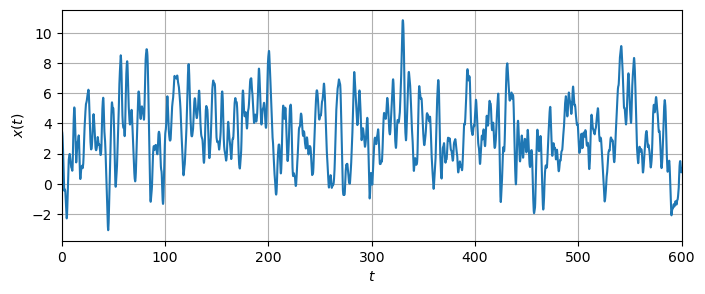

In [2]:
# Import and plot time series

import numpy as np
from matplotlib import pyplot as plt

# Load data from text file
data=np.loadtxt('x_timeseries.txt',delimiter=',',skiprows=1).T

t=data[0,:]
x=data[1,:]

plt.figure(figsize=(8,3))
plt.plot(t,x)
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.xlim(0,600)
plt.grid()

**a)**

In [3]:
# Calculate statistics

mean=np.mean(x)
print('The mean of x is ' + "{:.3f}".format(mean))

sd=np.std(x)
print('The variance of x is ' + "{:.3f}".format(sd**2))


The mean of x is 3.347
The variance of x is 4.887


**b)**

We repeat the statistical calculation for each data length

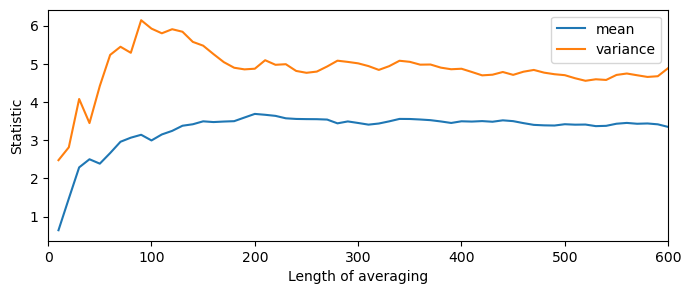

In [4]:
# Vector from 10 to 600 with intervals 10
T_test=np.arange(10,600+10,10)

mean_test=np.zeros(len(T_test))
sd_test=np.zeros(len(T_test))

# Loop over all the test lengths
for idx,T in enumerate(T_test):

    # Find the index where to cut the time axis
    idx_T=int(np.argmin(abs(t-T)))

    # Calculate statistics
    mean_test[idx]=np.mean(x[0:idx_T])
    sd_test[idx]=np.std(x[0:idx_T])

plt.figure(figsize=(8,3))
plt.plot(T_test,mean_test,label='mean')
plt.plot(T_test,sd_test**2,label='variance')
plt.grid()

plt.xlabel("Length of averaging")
plt.ylabel("Statistic")
plt.xlim(0,600)
plt.grid()
plt.legend()


The statistical metrics start to converge around 300 s. In theory, an infinite long sample is required $(T \rightarrow \infty)$ to obtain consistent statistics. In practice, we have to accept a reasonable degree of convergence from time series of finite length.

In general, processes with higher frequencies require shorter data lengths to achieve convergence in the statistics, as they complete more cycles compared to low-frequency processes.

**c)**

The process must be stationary and ergodic in order to calculate the mean and variance from the single time series.

**d)**

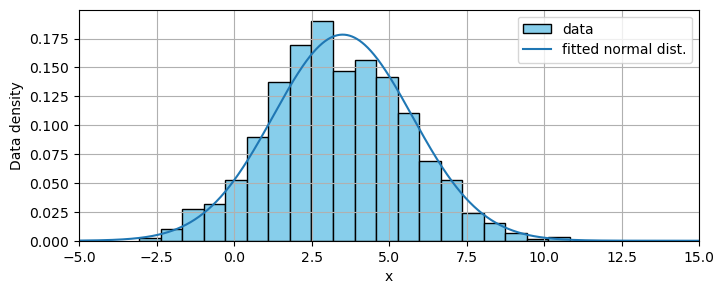

In [5]:
# Plot histogram

plt.figure(figsize=(8,3))
plt.hist(x, bins=20, color='skyblue', edgecolor='black',density=True,label='data')

plt.xlabel("x")
plt.ylabel("Data density")
plt.xlim(-5,15)
plt.grid()

# Add normal distribution
from scipy.stats import norm
x_axis=np.linspace(-5,15,1000)
fx_gaussian = norm.pdf(x_axis, loc=3.5, scale=np.sqrt(5.0))

plt.plot(x_axis,fx_gaussian,label='fitted normal dist.')
plt.legend()


From the histogram we observe that $x(t)$ seems to be a stochastic process with a Gaussian (normal) distribution: $x \sim \mathcal{N}(\mu \approx 3.5,\sigma^2 \approx 5.0)$. The bell-shaped curve with the using the mean and variance of the process fits well to the histogram data.

### Problem 3: Auto correlation of response


**a)** 

From basic beam theory

$\sigma_x=\frac{N}{A}+ \frac{M}{I} h/2$

**b)** 

$\text{E}[\sigma_x(t)]=\dfrac{1}{A}\text{E}[N(t)]+ \text{E}[M(t)] \dfrac{h/2}{I} =10+37.5=47.5$

where $\text{E}[N(t)]=\mu_N$ is the mean value of the axial force, and similar for the moment.

**c)** 

We utilize the definition:

$$
R_{\sigma_x}(\tau) = \text{E}[\sigma_x(t)\,\sigma_x(t+\tau)].
$$

First, let us express \$\sigma\_x(t)\$:

$$
\sigma_x(t) \;=\; \frac{N(t)}{A} \;+\; \frac{M(t)}{I}\,\frac{h}{2}
$$

We insert this into the auto-correlation and multiply out:

$$
\begin{aligned}
R_{\sigma_x}(\tau) 
&= \text{E}\!\left[\left(\frac{N(t)}{A} + \frac{M(t)}{I}\frac{h}{2}\right)\left(\frac{N(t+\tau)}{A} + \frac{M(t+\tau)}{I}\frac{h}{2}\right)\right] \\
&= \frac{1}{A^2}\,\text{E}[N(t)N(t+\tau)]
+ \frac{h}{2AI}\,\text{E}[N(t)M(t+\tau)] \\
&\quad+ \frac{h}{2AI}\,\text{E}[M(t)N(t+\tau)]
+ \left(\frac{h}{2I}\right)^2 \text{E}[M(t)M(t+\tau)].
\end{aligned}
$$

In terms of auto- and cross-correlation functions:

$$
R_{\sigma_x}(\tau) 
= \frac{1}{A^2} R_N(\tau) 
+ \frac{h}{2AI} R_{NM}(\tau) 
+ \frac{h}{2AI} R_{MN}(\tau) 
+ \left(\frac{h}{2I}\right)^2 R_M(\tau).
$$



We conclude that a process which is a sum of two other processes, will depend on the interaction (cross-correlation) between those two processes.

**d)**

If axial force $N$ and bending moment $M$ are uncorrelated, then

$$
R_{NM}(\tau)=0 \quad \text{and} \quad R_{MN}(\tau)=0.
$$

The expression simplifies to:

$$
R_{\sigma_x}(\tau) 
= \frac{1}{A^2} R_{N}(\tau) 
+ \left(\frac{h}{2I}\right)^2 R_{M}(\tau).
$$

**e)**

Whether two response quantities are (un)correlated will always depend on the structure under consideration and the loading. However, it is reasonable that they are uncorrelated if their sources are entirely different: for instance, if the moment was driven by stochastic wind loading, and the axial force was mainly due to stochastic traffic loads. These two types of loads are clearly not correlated, and so their induced responses tend not to be correlated either. 

**f)**


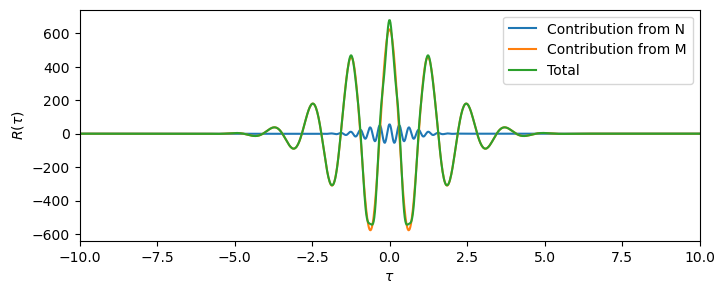

In [6]:
tau_axis=np.linspace(-10,10,1000)

sigma_N=30e3
sigma_M=10e6

A=4000
I=4e7
h=200

R_N=sigma_N**2*np.exp(-tau_axis**2)*np.cos(20*tau_axis)
R_M=sigma_M**2*np.exp(-0.2*tau_axis**2)*np.cos(5*tau_axis)
R_sigma=(1/A)**2*R_N+(h/2/I)**2*R_M

plt.figure(figsize=(8,3))
plt.plot(tau_axis,(1/A)**2*R_N,label='Contribution from N')
plt.plot(tau_axis,(h/2/I)**2*R_M,label='Contribution from M')
plt.plot(tau_axis,R_sigma,label='Total ')
plt.grid()

plt.xlabel(r'$\tau$')
plt.ylabel(r'$R(\tau)$')
plt.xlim(-10,10)
plt.grid()
plt.legend()

The variance of the stress is $(\frac{1}{A})^2 \sigma_N^2 + (\frac{h/2}{I})^2 \sigma_M^2=7.5^2+25^2=681$, so the standard deviation is $26$ MPa. The variance is also the max value in the figure above.

### Problem 4: Auto correlation function

* $x_1(t)$ is a smooth process in which, generally speaking, each point on the graph has values similar to those of nearby points (e.g., within 
$\pm 2$ s). However, points that are significantly far apart ($\geq 20$ s) show no correlation. Consequently, $R_C(\tau)$ therefore fits well.

* $x_2(t)$: This is a coarse process in which neighbouring points exhibit little correlation. For example, at a given instant $t_1$, the value might be high, while the next second it could drop significantly. This is similar to the process of drawing a new random number at each time step. As a result, the process appears highly chaotic.  $R_B(\tau)$ matches this characteristic since it has almost no correlation, except at $\tau=0$ where there will always be a perfect correlation.

* $x_3(t)$: This a process with only one dominant frequency, but the amplitude changes over time (aka. a narrow-banded process). Since the process has some periodicity, it will have both negative and positive correlations. For instance, a peak at time  $t_1$ will be correlated to peaks at $t_1+T_n$, $t_1+2T_n$, and so on. It will also be negatively correlated to valleys at $t_1+\frac{1}{2}T_n$ and $t_1+\frac{3}{2}T_n$. The correlation fades for longer time lags, however. $R_A(\tau)$ is the matching item, and it looks very typical of the autocorrelation function for a stochastic response in a system where only one mode is activated.


### Problem 5: Simulation of time series using auto correlation function

**a)**

We have the auto correlation function:

$$ R_x(\tau)= \sigma_x^2 \exp( - \dfrac{\tau^2}{2 L^2}) \cos(\omega \tau )$$

The time vector is $\mathbf{t} = [0,t_1,t_2,\dots,t_N] $, where $t_k = k \cdot \Delta t$.

To simulate a time series, we follow the method from Example 2.1 a random data series is drawn from the following covariance matrix:

$$\mathbf{\Sigma} _{\mathbf{X}_1}^2 = \left[ {\begin{array}{cc}
{{R_{{x}}}(0)}&{{R_{{x}}}({t_1} - {t_2})}& \cdots &{{R_{{x}}}({t_1} - {t_N})}\\
{{R_{{x}}}({t_2} - {t_1})}&{{R_{{x}}}(0)}& \cdots &{{R_{{x}}}({t_2} - {t_N})}\\
 \vdots & \vdots & \ddots & \vdots \\
{{R_{{x}}}({t_N} - {t_1})}&{{R_{{x}}}({t_N} - {t_2})}& \cdots &{{R_{{x}}}(0)}
\end{array}} \right]$$

The time vector is $40/0.05=800$ elements long, so this covariance matrix will be $800\times 800$. This is close to the limit of what is practical since drawing numbers from very large matrices takes a long time.


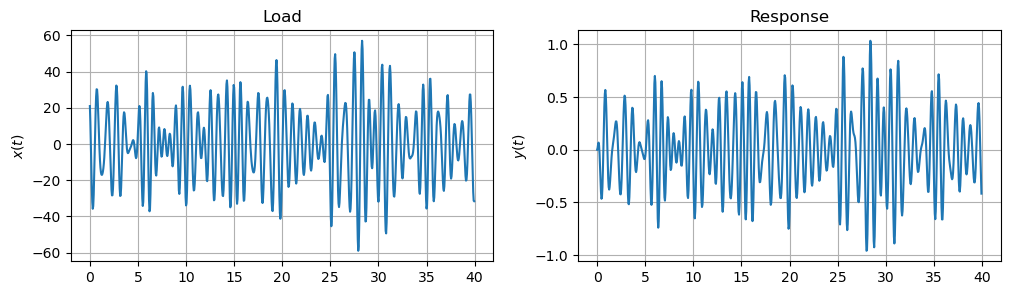

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import time

import sys
sys.path.append('./../../modules')
from time_integration import * # Import all functions in the module time_integration

# Parameters of the auto covariance
sigma=20.0
L=1.0
omega=8


dt=0.05 # Time step
t=np.arange(0,40,dt) # Time vector

tau_mat = np.abs(np.array([t])-np.array([t]).T) # Matrix of all possible time lags
mean = np.zeros((t.shape[0])) # Vector of mean values 
cov = sigma**2*np.exp(-0.5*tau_mat**2/L**2)*np.cos(omega*tau_mat) # Co-variance matrix defined using the auto correlation function

x = np.random.multivariate_normal(mean,cov,1) # Simulate the points

# System parameters
m=1.0
c=5.0
k=100.0

u0 = np.array([0.0]) #Initial displacement
udot0 = np.array([0.0]) # Initial velocity

# Solve by Newmark
y, ydot, y2dot = linear_newmark_krenk(m,c,k,x,u0,udot0,dt)

# Plot load and response
fig, axs = plt.subplots(1,2,figsize=(12,3))
axs[0].plot(t, x[0,:])
axs[0].set_ylabel('$x(t)$')
axs[0].set_title('Load')
axs[0].grid(True)

axs[1].plot(t, y[0,:])
axs[1].set_ylabel('$y(t)$')
axs[1].set_title('Response')
axs[1].grid(True)


**b)**

In [8]:
sd_y=np.std(y)

print('SD of response is ' + str(sd_y))

SD of response is 0.3594665670462861


**c**)

The calculation procedure is repeated using for loop where $\mathbf{\omega}=[1,2,3,\cdots,15]$. 

Text(0.5, 0, '$\\omega$')

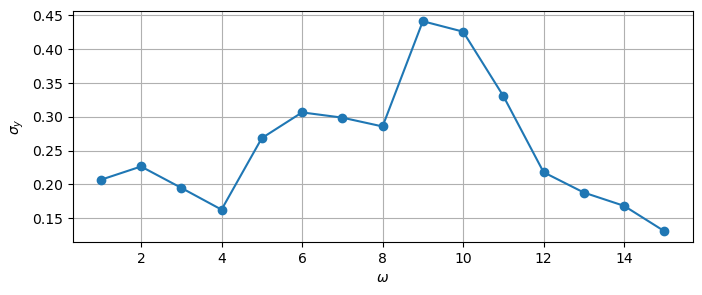

In [9]:
omega_test=np.arange(1.0,15.0+1.0,1.0) # Vector with all omega to test

sd_y=np.zeros_like(omega_test)
for idx in np.arange(len(omega_test)):
    
    cov = sigma**2*np.exp(-0.5*tau_mat**2/L**2)*np.cos(omega_test[idx]*tau_mat) # Co-variance matrix defined using the auto correlation function
    
    x = np.random.multivariate_normal(mean,cov,1) # Simulate the points
    
    y, ydot, y2dot = linear_newmark_krenk(m,c,k,x,u0,udot0,dt) # Find dynamic response
    
    sd_y[idx]=np.std(y)  # Calculate standard deviation of the response

plt.figure(figsize=(8,3))
plt.plot(omega_test,sd_y,'-',marker='o')
plt.grid()
plt.ylabel(r'$\sigma_y$')
plt.xlabel(r'$\omega$')


We see a clear trend: for small $\omega$, the response is rather small. The greatest response is obtained around $\omega=10$ rad/s, which coincides with the natural frequency: $\omega_n=\sqrt{k/m}=\sqrt{100}=10$ rad/s. For higher $\omega$ much higher than the natural frequency, the system is mainly in the mass-controlled regime where the response also is lower.

When we generate the time series using  $R(\tau)$ for different $\omega$, distinct changes in the frequency characteristics of $x(t)$ become evident. This indicates that the auto correlation function $R(\tau)$, despite being a time-domain function, inherently reflects information about the frequency content as well. This will be studied more in detail in later topics (spectral density).

There is also a small variability in the results for the standard deviation (the curves changes a bit for every run). This is because the 40 s long time series is not long enough to determine the statistical moments very accurately, so there will be some uncertainty in the results. 